<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Doble rendija </font>
</div>

<div align="center"> 
<font size=5> Generación para el CLUR </font>
</div>

- **Para**: Fabricación de máscaras en CLUR con laser de femtosegundos

- **Fecha**: 2024/02/28
        
- **Objetivos**: Generar las máscaras de doble rendija para TFM 

- **Descripción** - 

- **Referencias**: -

- **Autores**: Luis Miguel Sánchez Brea

In [1]:
from diffractio import np, plt, sp

import ezdxf

/home/luismiguel/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend
import matplotlib.pyplot as plt

mm=1.
um=mm/1000.
nm = um/1000.

inches = 25.4*mm

In [3]:
dxf_params = dict(

version="R2000",
total_size=4*inches,
num_masks=(4, 4),
line_size=5*um,
)



# Definitions

In [4]:
def start_drawing(**dxf_params):
    
    version = dxf_params['version']
    total_size = dxf_params['total_size']
    num_masks = dxf_params['num_masks']
    line_size = dxf_params['line_size']
    
    
    doc = ezdxf.new(version)
    msp = doc.modelspace()
    total_size = total_size
    num_masks = np.array(num_masks)
    line_size = line_size
    mask_size = (total_size)/np.array(num_masks)  # -5*line_size

    return doc, msp, mask_size

In [5]:
def rectangle(msp, r0: list[float], size: list[float], origin='0'):
    
    x0, y0 = r0
    sx, sy = size
    
    if origin == '0':
        init_point = np.array([0,0])
    elif origin == 'center':
        init_point = np.array([-sx/2, -sy/2])
    
    # print(init_point)
    points = np.array([(0,0), (sx,0), (sx,sy), (0,sy), (0,0)])
    points = points + r0 + init_point
    msp.add_lwpolyline(points, close=True)
    
    return msp

    


In [6]:
def double_slit(msp, r0: list[float], width: float, height: float, separation: float, origin: str = '0'):
    
    x0, y0 = r0
    
    rect1_x = x0 - separation/2 - width/2
    rect1_y = -height/2

    rect2_x = x0 + separation/2 - width/2
    rect2_y = -height/2
    
    r1 = (rect1_x, rect1_y)
    r2 = (rect2_x, rect2_y)

    size = (width, height)
    
    rectangle(msp, r0=r1, size=size, origin=origin)
    rectangle(msp, r0=r2, size=size, origin=origin)
    
    return msp

In [7]:
def draw(doc, msp):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(msp, finalize=True)

In [8]:
def save_png(doc, filename:str, dpi:int = 300, has_draw: bool = False):


    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(doc.modelspace(), finalize=True)
    fig.savefig(filename, dpi=dpi)
    if has_draw is False:
        plt.close()

## Draw circles

In [9]:
r0=(0*mm, 0*mm)
height = 20*mm

width = 90*um
separation = 350*um

# Actualmente tenemos rendijas de 160 micras separadas 730 micras

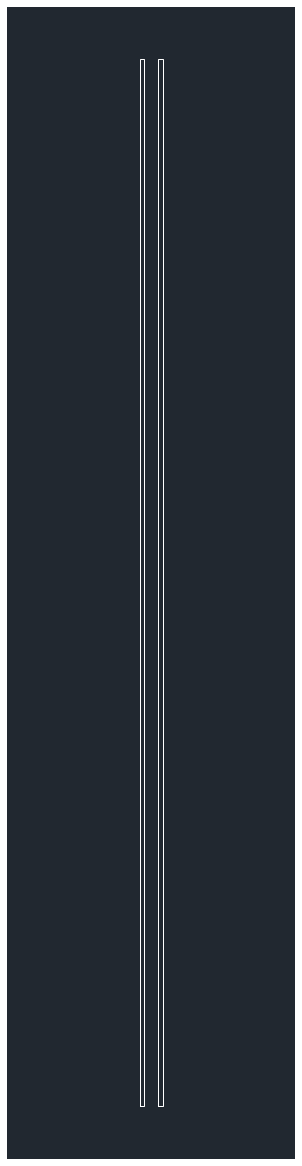

In [14]:
doc, msp, mask_size = start_drawing(**dxf_params)


msp = double_slit(msp, r0=r0, width=width, height=height, separation=separation, origin = '0')

name = '240228 clur - double_slit'

draw(doc, msp)
doc.saveas(name+'.dxf')
save_png(doc, filename=name+'.png', dpi = 600)

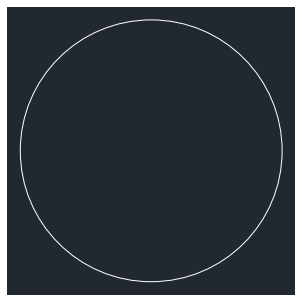

In [12]:
doc, msp, mask_size = start_drawing(**dxf_params)



msp.add_circle(center = r0, radius = 1*inches)
name = '240228 clur - double_slit - cut'

draw(doc, msp)
doc.saveas(name+'.dxf')
save_png(doc, filename=name+'.png', dpi = 600)

# all

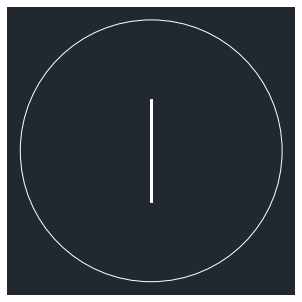

In [16]:
doc, msp, mask_size = start_drawing(**dxf_params)


msp = double_slit(msp, r0=r0, width=width, height=height, separation=separation, origin = '0')
msp.add_circle(center = r0, radius = 1*inches)

name = '240228 clur - double_slit'

draw(doc, msp)
save_png(doc, filename=name+' - all.png', dpi = 600)